# Datasaurus Dozen: All have same low order summary statistics

In [1]:
import pandas as pd
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt

try:
    from probml_utils import latexify, savefig, is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig, is_latexify_enabled

In [2]:
latexify(fig_height=3.7)

/home/patel_zeel/miniconda3/envs/probml_murphy/lib/python3.9/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [4]:
SCATTER_SIZE = 4 if is_latexify_enabled() else 24
FIG_SIZE = None if is_latexify_enabled() else (15, 10)


def make_graph(ax, data, color=None):
    x = data["x"]
    y = data["y"]
    name = data["name"]

    ax.scatter(x, y, s=SCATTER_SIZE, color=color)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    if is_latexify_enabled():
        name = name.replace("_", "\_")  # to deal with latex keywords' conflict
    ax.set_title(f"Dataset: {name}")  # title for text-book

dino
                x           y
count  142.000000  142.000000
mean    54.263273   47.832253
var    281.069988  725.515961

h_lines
                x           y
count  142.000000  142.000000
mean    54.261442   47.830252
var    281.095333  725.756931

v_lines
                x           y
count  142.000000  142.000000
mean    54.269927   47.836988
var    281.231512  725.638809

x_shape
                x           y
count  142.000000  142.000000
mean    54.260150   47.839717
var    281.231481  725.224991

star
                x           y
count  142.000000  142.000000
mean    54.267341   47.839545
var    281.197993  725.239695

high_lines
                x          y
count  142.000000  142.00000
mean    54.268805   47.83545
var    281.122364  725.76349

dots
                x           y
count  142.000000  142.000000
mean    54.260303   47.839829
var    281.156953  725.235215

circle
                x           y
count  142.000000  142.000000
mean    54.267320   47.837717
var    280

/home/patel_zeel/miniconda3/envs/probml_murphy/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


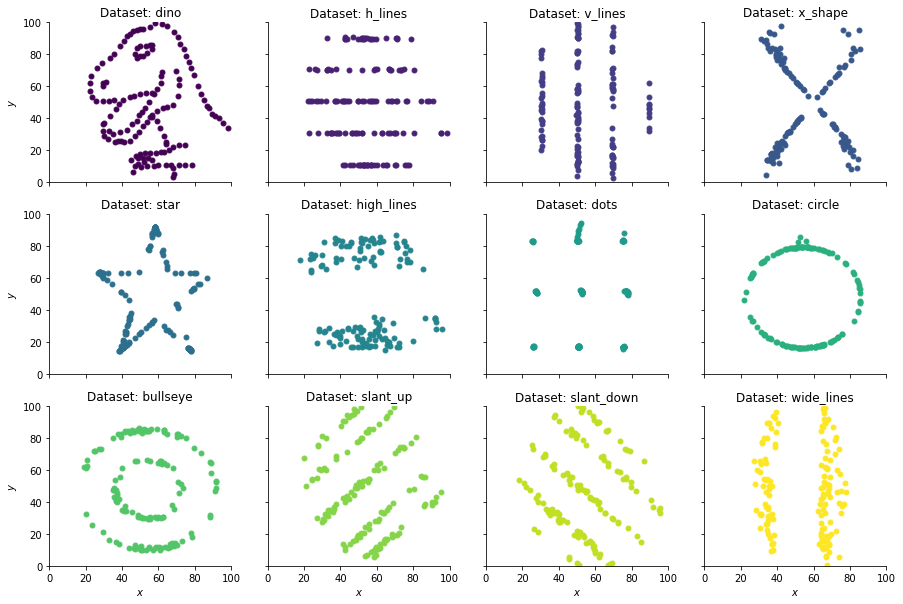

In [5]:
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/DatasaurusDozen.tsv"
df = pd.read_csv(url, sep="\t")

dataset_names = [
    "dino",
    "h_lines",
    "v_lines",
    "x_shape",
    "star",
    "high_lines",
    "dots",
    "circle",
    "bullseye",
    "slant_up",
    "slant_down",
    "wide_lines",
]

fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=FIG_SIZE)

axs = []
for row in axes:
    for ax in row:
        axs.append(ax)


color_map = plt.cm.get_cmap(lut=12)

for i, name in enumerate(dataset_names):
    print(name)
    name_index = df["dataset"] == name
    data_df = df[name_index]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"].values.reshape(-1, 1)
    y = data_df["y"].values.reshape(-1, 1)

    data = {"x": x, "y": y, "name": name}

    ax = axs[i]
    make_graph(ax, data, color=color_map(i))

    if i >= 8:
        ax.set_xlabel("$x$")
    if i % 4 == 0:
        ax.set_ylabel("$y$")

    mean_x = data_df["x"].to_numpy().mean()
    mean_y = data_df["y"].to_numpy().mean()
    print(data_df[["x", "y"]].agg(["count", "mean", "var"]), end="\n\n")

    sns.despine()

savefig("datasaurus12.pdf");